# Learning to create a basic RL environment using Gymnasium

In [49]:
import gymnasium as gym
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

## Understanding the Cartpole environment implementation

The library Gymnasium have some classic environments implemented (Cartopole example included). You can check the Cartpole implementation [here](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py). You can create a cartpole environment using the following:

In [50]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

The agent actions are "left" or "right", and the environment considers a discrete variable 0 and 1 representing them. Try re-running the code below to verify the `action_space.sample()` function generating different possible actions to be applied in the environment. The action space is a placeholder that indicates the format an action should follow.

In [51]:
print(f"Action space: {env.action_space}")
print(f"1st sample of action space: {env.action_space.sample()}")
print(f"2nd sample of action space: {env.action_space.sample()}")
print(f"3rd sample of action space: {env.action_space.sample()}")

Action space: Discrete(2)
1st sample of action space: 0
2nd sample of action space: 1
3rd sample of action space: 0


The action space using Gym can also verify if a given variable obbeys to the pre-defined action space format to avoid incompatibility problems.

In [52]:
action1 = 0
action2 = 3
action3 = "left"
action4 = [0]
env.action_space.contains(0)
print(f"Action 1 is valid: {env.action_space.contains(action1)}")
print(f"Action 2 is valid: {env.action_space.contains(action2)}")
print(f"Action 3 is valid: {env.action_space.contains(action3)}")
print(f"Action 4 is valid: {env.action_space.contains(action4)}")

Action 1 is valid: True
Action 2 is valid: False
Action 3 is valid: False
Action 4 is valid: False


In the same way, the observartion space to the cartpole is defined as 4 variables representing:

![Cartpole observation](imgs/cartpole_obs.png)

The Gymnasium environment already implement an observation space placeholder with that information as we can check using:

In [53]:
print("Observation space type and format: ", env.observation_space)
print("1st sample of observation space: ", env.observation_space.sample())
print("2nd sample of observation space: ", env.observation_space.sample())
print("3rd sample of observation space: ", env.observation_space.sample())

Observation space type and format:  Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
1st sample of observation space:  [ 0.84353894 -0.20312628  0.11037614 -2.6118357 ]
2nd sample of observation space:  [-1.6640863  -0.6643685  -0.20529163 -1.3677762 ]
3rd sample of observation space:  [ 1.9321669   0.1934707   0.17599496 -0.93365425]


The different Spaces, like Box and Discrete, available in Gymnasium could be checked [here](https://gymnasium.farama.org/api/spaces/).

**The reward function does not need a placeholder specification like the action and observation space since it is always a unique real number.**

## Modeling the dumbest agent possible for controlling the cartpole problem (**Without RL**)

In [54]:
def dumb_action_policy(observation: np.ndarray) -> int:
    pole_angle = observation[2]
    return 0 if pole_angle < 0 else 1

### Integrating the agent and the environment

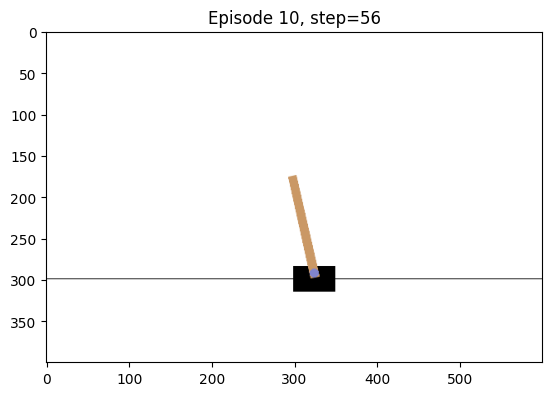

Performance report:
Episode 1: reward=62.0, steps=62
Episode 2: reward=49.0, steps=49
Episode 3: reward=40.0, steps=40
Episode 4: reward=32.0, steps=32
Episode 5: reward=55.0, steps=55
Episode 6: reward=56.0, steps=56
Episode 7: reward=35.0, steps=35
Episode 8: reward=55.0, steps=55
Episode 9: reward=37.0, steps=37
Episode 10: reward=56.0, steps=56


In [ ]:
number_of_episodes = 10

terminated = False
total_reward = 0
report_performance = []
for episode in range(number_of_episodes):
    obs, _ = env.reset()  # Initial observation
    terminated = False
    total_reward = 0
    number_steps_not_falling = 0
    while not terminated:
        action = dumb_action_policy(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += float(reward)
        number_steps_not_falling += 1
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.title(f"Episode {episode + 1}, step={number_steps_not_falling}")
        plt.show()
    report_performance.append((total_reward, number_steps_not_falling))
print("Performance report:")
for episode, (total_reward, number_steps_not_falling) in enumerate(report_performance):
    print(
        f"Episode {episode + 1}: reward={total_reward}, steps={number_steps_not_falling}"
    )

## What is needed to implement an environment using the Gymnasium API?